# DNN Keras CIFAR10

In [1]:
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear  
# inline in the notebook rather than in a new window.
%matplotlib inline

# set default size of plots
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.
/home/pedro/miniconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pedro/miniconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pedro/miniconda3/envs/computer-vision/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [3]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

[INFO] loading CIFAR-10 data...


In [4]:
# convert the labels from integers to vectors
labelBinarizer = LabelBinarizer()
trainY = labelBinarizer.fit_transform(trainY)
testY = labelBinarizer.fit_transform(testY)

In [5]:
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [6]:
# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [7]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 27s 531us/step - loss: 1.8354 - acc: 0.3444 - val_loss: 1.6947 - val_acc: 0.4067
Epoch 2/100
50000/50000 [==============================] - 26s 520us/step - loss: 1.6500 - acc: 0.4149 - val_loss: 1.6539 - val_acc: 0.4130
Epoch 3/100
50000/50000 [==============================] - 26s 518us/step - loss: 1.5665 - acc: 0.4452 - val_loss: 1.5484 - val_acc: 0.4562
Epoch 4/100
50000/50000 [==============================] - 26s 517us/step - loss: 1.5095 - acc: 0.4640 - val_loss: 1.4895 - val_acc: 0.4728
Epoch 5/100
50000/50000 [==============================] - 26s 519us/step - loss: 1.4625 - acc: 0.4839 - val_loss: 1.5073 - val_acc: 0.4541
Epoch 6/100
50000/50000 [==============================] - 26s 517us/step - loss: 1.4219 - acc: 0.4975 - val_loss: 1.5288 - val_acc: 0.4529
Epoch 7/100
50000/50000 [==============================] - 26s 516us/step - loss: 1

50000/50000 [==============================] - 26s 518us/step - loss: 0.2704 - acc: 0.9161 - val_loss: 1.6950 - val_acc: 0.5654
Epoch 63/100
50000/50000 [==============================] - 26s 519us/step - loss: 0.2587 - acc: 0.9198 - val_loss: 1.8808 - val_acc: 0.5325
Epoch 64/100
50000/50000 [==============================] - 26s 518us/step - loss: 0.2469 - acc: 0.9268 - val_loss: 1.8093 - val_acc: 0.5461
Epoch 65/100
50000/50000 [==============================] - 26s 518us/step - loss: 0.2328 - acc: 0.9295 - val_loss: 1.8989 - val_acc: 0.5361
Epoch 66/100
50000/50000 [==============================] - 26s 518us/step - loss: 0.2224 - acc: 0.9330 - val_loss: 1.8464 - val_acc: 0.5566
Epoch 67/100
50000/50000 [==============================] - 26s 517us/step - loss: 0.2135 - acc: 0.9380 - val_loss: 1.8330 - val_acc: 0.5589
Epoch 68/100
50000/50000 [==============================] - 26s 518us/step - loss: 0.2032 - acc: 0.9407 - val_loss: 1.8757 - val_acc: 0.5480
Epoch 69/100
50000/50000 [

In [8]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.61      0.67      0.64      1000
  automobile       0.69      0.67      0.68      1000
        bird       0.45      0.48      0.47      1000
         cat       0.42      0.37      0.39      1000
        deer       0.49      0.54      0.52      1000
         dog       0.49      0.44      0.47      1000
        frog       0.62      0.63      0.63      1000
       horse       0.64      0.62      0.63      1000
        ship       0.70      0.70      0.70      1000
       truck       0.60      0.61      0.61      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000



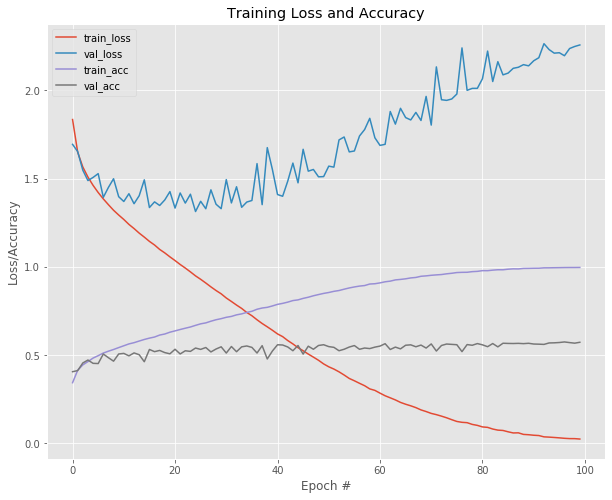

In [9]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

Well Done